In [1]:
# importing library

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
# reading .csv file

df = pd.read_csv('Election Preferences.csv')
df

Voter ID  Tax Bracket  Gender  Previous Elections Preferred Candidate  \
0       10023        13600       1                   0               Trump   
1       10024        51800       0                   2              Hilary   
2       10025        87500       0                   2              Hilary   
3       10026       156000       1                   3               Trump   
4       10027        51800       0                   0               Trump   
..        ...          ...     ...                 ...                 ...   
220     10243        13600       0                   0               Trump   
221     10244        13600       1                   1               Trump   
222     10245        51800       1                   1               Trump   
223     10246       156000       1                   3              Hilary   
224     10247        13600       1                   0               Trump   

     2015 Income  Age  
0          16186   24  
1          87200   35  
2         100682   38  
3         221175   40  
4          62122   19  
..           ...  ...  
220        19964   32  
221        18899   23  
222        65504   29  
223       196422   37  
224        14778   29  

[225 rows x 7 columns]

In [4]:
# importing library

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

### 1. Feature Selection – Without using SciKit Learn determine which feature to use for the first branch split in the decision tree using Entropy/ Information Gain

#### From my database, I will use previous Elections feature for the first branch split in the decision tree using Entropy/ Information Gain because it is gaining most contributing predictive feature for my output of election preferences.

### 2. Fit the model using the …. Decision Tree Classifier in SciKit Learn 

#### a. Using Entropy/ Information Gain

In [5]:
decision_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
X = df.drop(['Voter ID','Preferred Candidate','2015 Income','Age'], axis=1) # feature names
y = df['Preferred Candidate'] # target names

In [7]:
dt = decision_tree.fit(X, y)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
fn = ['Tax Bracket','Gender','Previous Elections']

In [9]:
columns = list(df)
target_name = columns[4]
target_name

'Preferred Candidate'

In [10]:
dot_data = export_graphviz(dt, out_file='dt.dot', class_names=target_name, feature_names=fn, filled = True)

In [11]:
#conda install python-graphviz
!dot -Tpng dt.dot -o dt.png -Gdpi=600

In [12]:
from IPython.display import Image

In [13]:
Image(filename = 'dt.png')

In [14]:
print ( "Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), y)))

Accuracy = 0.840


#### b. Using Gini Impurity 

In [15]:
decision_tree = DecisionTreeClassifier(max_depth=4, criterion='gini')

In [16]:
dt = decision_tree.fit(X, y)

In [17]:
dot_data = export_graphviz(dt, out_file='dt.dot', class_names=target_name, feature_names=fn, filled = True)

In [18]:
!dot -Tpng dt.dot -o dt.png -Gdpi=600

In [19]:
from IPython.display import Image

In [20]:
Image(filename = 'dt.png')

In [21]:
print("Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), y)))

Accuracy = 0.840


### 3. Using either method, experiment with max_depth and comment on what you think is the optimal depth for this model 

In [22]:
decision_tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')

In [23]:
dt = decision_tree.fit(X, y)

In [24]:
print("Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), y)))

Accuracy = 0.836


In [25]:
decision_tree = DecisionTreeClassifier(max_depth=5, criterion='entropy')

In [26]:
dt = decision_tree.fit(X, y)

In [27]:
print("Accuracy = %.3f" % (metrics.accuracy_score(decision_tree.predict(X), y)))

Accuracy = 0.844


For my decision tree, I am getting 0.840 accuracy for depth 4. But when i am decreasing my depth to number 3 than i am getting less accuracy compare to original and when i am incresing my depth than i am getting more accuracy compare to original depth 4. the optical depth for model is 5.

### 4.  Looking at your final model are there any groups that have a relatively large population and high probability.  Does this model work for the data?

#### In previous election of data is <= 0.5 and it is false at that time we are getting highest probability of entropy. Yes this model is working for our data.

### 5. Using scikit learn. Fit the data to a random forest model. 

In [28]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
random_fit= rf.fit(X,y) # fit the random forest classifier

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy = %.3f" % (metrics.accuracy_score(random_fit.predict(X), y)))

Accuracy = 0.844


### 6. Find a numpy command that will give you a random number corresponding to an index row from the data set

In [36]:
import random

row = df.sample() # getting random row
row

Voter ID  Tax Bracket  Gender  Previous Elections Preferred Candidate  \
14     10037        87500       0                   0               Trump   

    2015 Income  Age  
14       128719   39

### 7. Use that row as a prediction in the Random Forest model you have created, does it provide a correct result?

In [37]:
row = X.loc[14] 
row = row.values.reshape(1,-1) # Reshaping the random row 
y_pred = rf.predict(row) # predicting the row
print ("Prediction :", y_pred)

Prediction : ['Trump']


#### Yes, I am getting correct result using Random Forest model.

### 8. Use Matplotlib to chart the '2015 Income' with another feature of your choosing.  Are you able to make out any clear segments?

In [34]:
a = df['2015 Income']
b = df['Age']

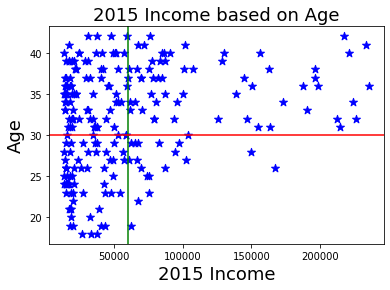

In [35]:
import matplotlib.pyplot as plt


plt.scatter(a,b,marker='*', s=70,color = 'b')
plt.title('2015 Income based on Age', fontsize=18)
plt.xlabel('2015 Income', fontsize=18)
plt.ylabel('Age', fontsize=18)

plt.axvline(60000,color = 'g')
plt.axhline(30,color = 'r')
plt.show()